In [2]:
# Imports
import pandas as pd

In [3]:
# Data
data = pd.read_csv('http://bcf.usc.edu/~gareth/ISL/Advertising.csv',index_col=0)

In [4]:
# View data
data.head()
#data.tail()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
# Shape data
data.shape

(200, 4)

In [7]:
# Seaborn
import seaborn as sns

%matplotlib inline

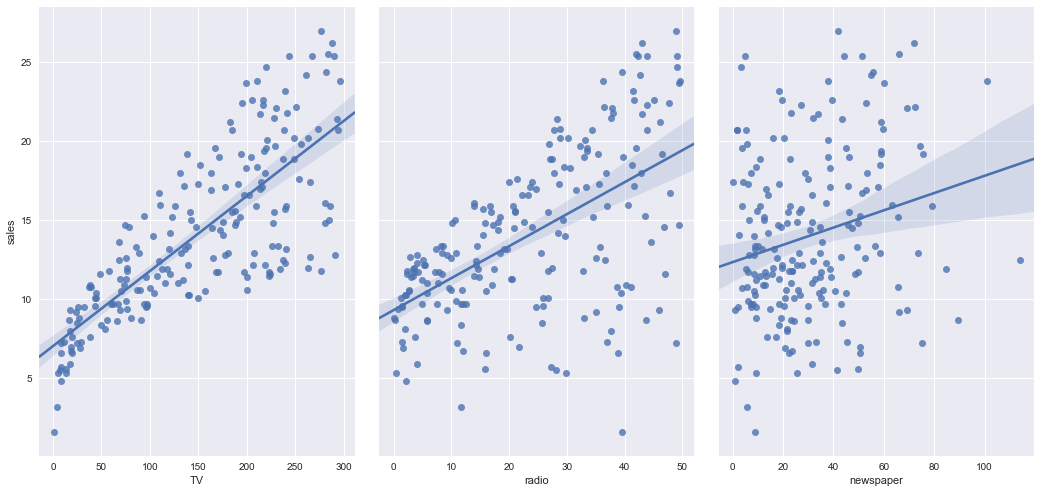

In [9]:
# Data Plot
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', size=7, aspect=0.7, kind='reg')

#### De acordo com os gráficos é aplicavel uma regressão linear em TV devido a uniformidade

In [13]:
# Motando eixo X
feature_cols = ['TV','radio','newspaper']
x = data[feature_cols]
x.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [16]:
print(type(x))
print(x.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [17]:
# Montando eixo Y
y = data['sales']
# Ou
# y = data.sales
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

### Treinando

In [31]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


In [56]:
from sklearn.linear_model import LinearRegression

def LinReg(vX,vY):
    linReg = LinearRegression()
    linReg.fit(vX,vY)
    print(linReg)
    return

LinReg(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


### Interpretando coeficientes do modelo

In [57]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

print(linreg.intercept_)
print(linreg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [58]:
list(zip(feature_cols, linreg.coef_))

[('TV', 0.046564567874150288),
 ('radio', 0.17915812245088836),
 ('newspaper', 0.0034504647111803788)]

In [67]:
# Criando previsões
true = [100,50,30,20]
y_pred = linreg.predict(x_test)

In [72]:
# Calcular a distancia entre o ponto e a prograssão linear
from sklearn import metrics

true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

print(metrics.mean_absolute_error(true, pred))

10.0


In [78]:
import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1.40465142303


In [82]:
feature_cols = ['TV','radio']
x = data[feature_cols]
y = data.sales
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=1)
linreg.fit(x_train,y_train)
y_pred = linreg.predict(x_test)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1.38790346994
